In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df= pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns


**EDA**

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


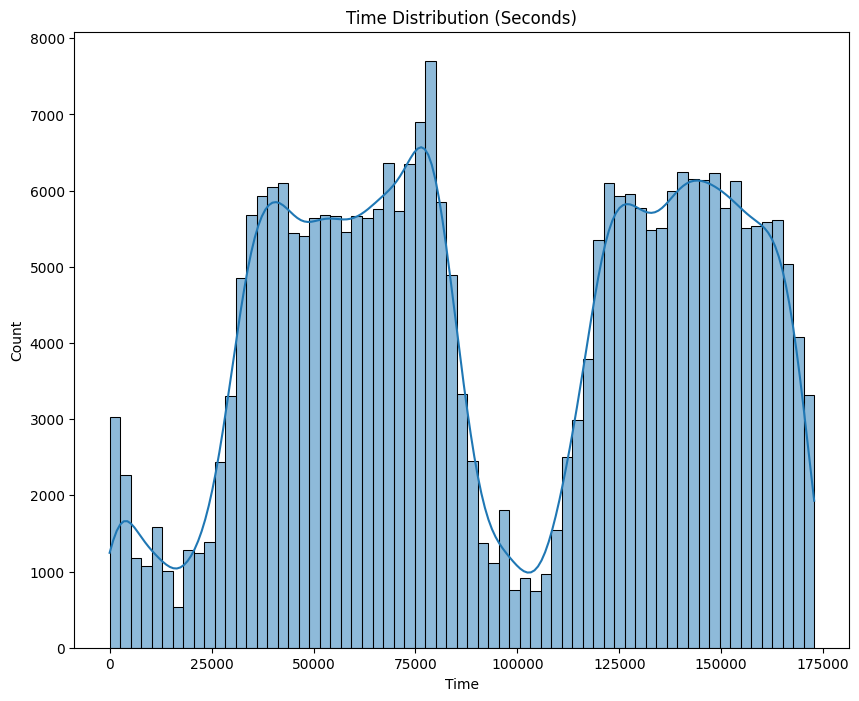

In [7]:
# time distribution
plt.figure(figsize=(10,8), )
sns.histplot(data=df, x="Time", kde=True)
plt.title('Time Distribution (Seconds)')

# Save the plot as PNG file
plt.savefig('time_distribution.png');


there are two mainly transaction time (two peaks)
- around 50000s(14h)
- aroud 150000s(33h)

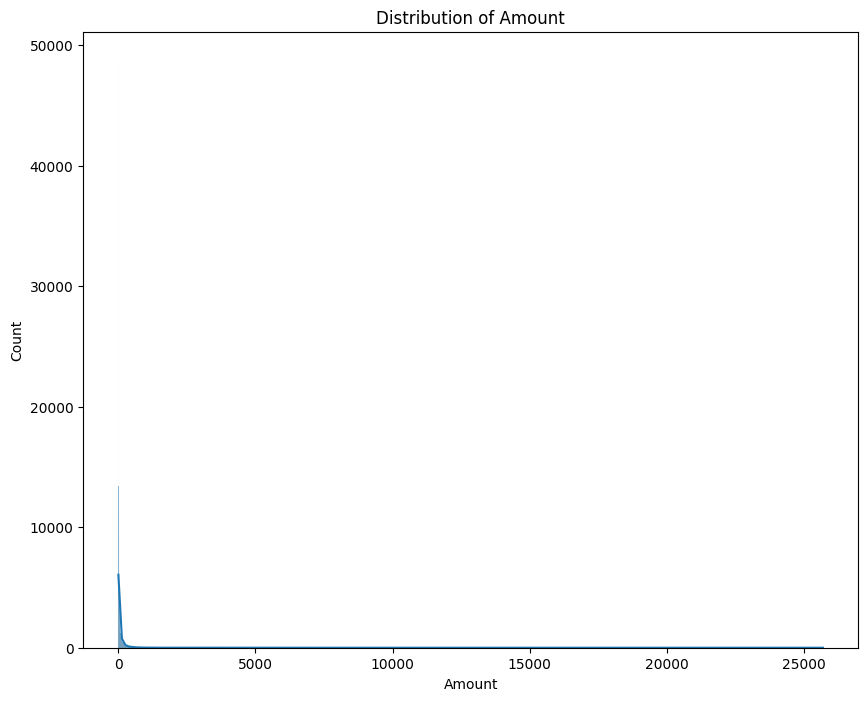

In [8]:
# Amount distribution
plt.figure(figsize=(10,8), )
sns.histplot(data=df, x="Amount", kde=True)
plt.title('Distribution of Amount')

# Save the plot as PNG file
plt.savefig('Amount_distribution.png');


distribution of the amount is highly skewed to the right. almos of the transaction is low amounts, a few transactions have extremely high amounts. as a resutl, there are some outlier need to handle.

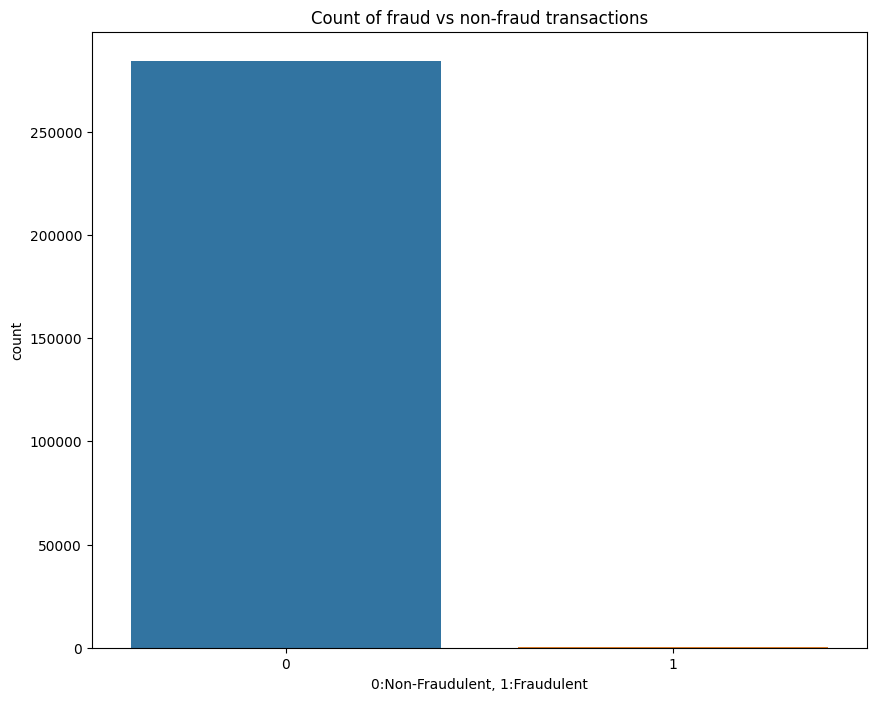

In [9]:
# count of fraud vs non-fraud transactions
plt.figure(figsize=(10,8), )
sns.countplot(df, x="Class",  )
plt.title('Count of fraud vs non-fraud transactions')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

# Save the plot as PNG file
plt.savefig('count_of_transactions.png');


the dataset is highly imbalance

In [10]:
value_counts = df['Class'].value_counts()
value_counts


Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
percentage_distribution = (value_counts / len(df)) * 100
percentage_distribution

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

**Data processing**

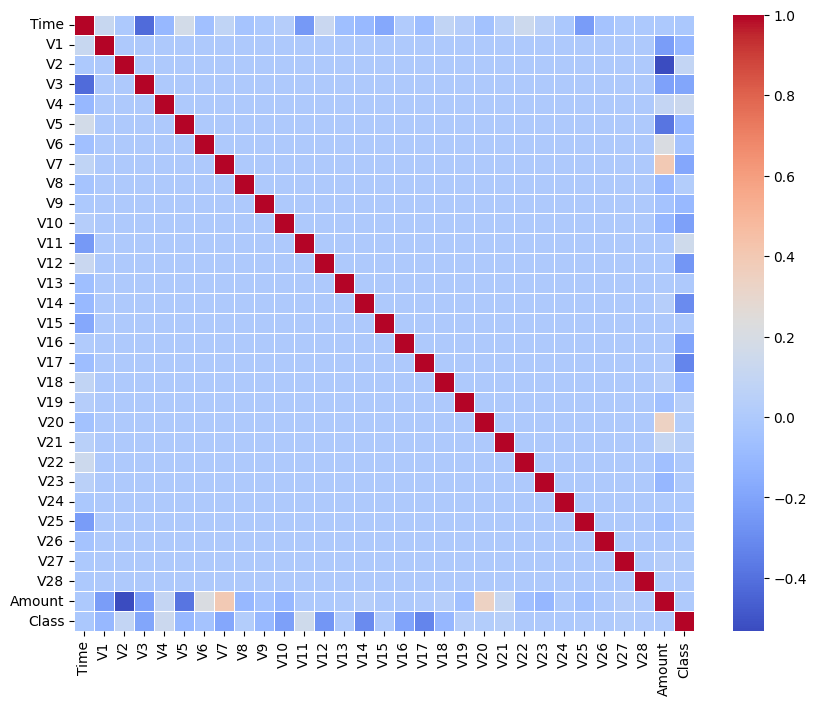

In [12]:
#heatmap
plt.figure(figsize = (10, 8))

sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

# Save the plot as PNG file
plt.savefig('heatmap.png');


- time and v3 with a correlation coefficient of -0.4
- amount and v2 with a correlation coefficient of -0.4
- amount and v7 with a correlation coefficient of 0.4
 
 As a resutl, the heatmap suggests that there are no highly correlated variables that need to be removed. the risk of multicollinearity is not expected to be significant.

**Modeling**

In [13]:
data = df.drop(columns= ['Class'])
target = df['Class']

In [14]:
#split data into 60% for traning, 20% esting and 20% for validation
X_trainval, X_test, y_trainval, y_test = train_test_split(data, target,
                                                        test_size = 0.2, 
                                                        stratify=df['Class'],
                                                        random_state=50
                                                     )
X_train, X_val,y_train, y_val = train_test_split(X_trainval, y_trainval,
                                                test_size = 0.25,
                                                stratify= y_trainval,
                                                random_state=42)


In [15]:
y_test

78573     0
10936     0
68153     0
206882    0
249586    0
         ..
98784     0
255672    0
120017    0
113631    0
256095    0
Name: Class, Length: 56962, dtype: int64

In [16]:
# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)



In [17]:
X_test_std

array([[-7.81187179e-01, -9.21570338e-01, -2.74387502e-01, ...,
         6.06544848e-01, -1.04779092e+00,  6.43039826e-01],
       [-1.59783627e+00,  3.49755737e-01, -4.05948459e-01, ...,
         8.19826950e-02,  1.50867677e-01,  3.87943765e-01],
       [-8.80823164e-01,  5.96121178e-01, -2.70730276e-02, ...,
        -1.21840974e-01, -3.71767669e-02, -3.56956466e-01],
       ...,
       [-4.00711069e-01,  8.11776564e-01, -4.00550065e-01, ...,
         1.72830862e-02,  1.76619712e-02, -3.61025836e-01],
       [-4.54157351e-01,  5.50449342e-01, -2.00399703e-01, ...,
        -1.19190288e-03,  2.50751406e-02,  5.50519580e-03],
       [ 1.32097015e+00, -4.85548399e-01, -1.36413444e-01, ...,
        -6.84376801e-02, -2.76395057e-01, -1.72668342e-02]])

In [18]:
# using Random Undersampling to address the issue of imbalanced classes. 
# instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
# fit it to the training data
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)
# fit it to the validation data
X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)


Logistic Regression


In [19]:
param_grid = {
    'C': np.logspace(0,4,10,100,1000),  
    'penalty': ['l2'],     
}

logistic_model = LogisticRegression(solver='lbfgs',max_iter=10000)
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='roc_auc',verbose=10, n_jobs=-1,)
logistic_grid_search.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [20]:
best_params = logistic_grid_search.best_params_
best_model = logistic_grid_search.best_estimator_

# Print the best hyperparameters and model
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'C': 464.15888336127773, 'penalty': 'l2'}
Best Model: LogisticRegression(C=464.15888336127773, max_iter=10000)


In [21]:
logistic_grid_search.best_score_

0.9736857224935364

Random Forest

In [22]:
param_grid = {
    'n_estimators': [100, 200],        # Number of trees in the forest
    'max_depth': [5, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [10,20],       # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt'],     # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether or not to bootstrap samples
}


rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc',verbose=10, n_jobs=-1,)
rf_grid_search.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 1/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.983 total time=   0.0s
[CV 5/5; 1/10] START C=1.0, penalty=l2..........................................
[CV 5/5; 1/10] END ...........C=1.0, penalty=l2;, score=0.974 total time=   0.0s
[CV 2/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 2/5; 2/10] END C=21.544346900318832, penalty=l2;, score=0.997 total time=   0.0s
[CV 5/5; 2/10] START C=21.544346900318832, penalty=l2...........................
[CV 5/5; 2/10] END C=21.544346900318832, penalty=l2;, score=0.963 total time=   0.0s
[CV 3/5; 3/10] START C=464.15888336127773, penalty=l2...........................
[CV 3/5; 3/10] END C=464.15888336127773, penalty=l2;, score=0.959 total time=   0.1s
[CV 1/5; 4/10] START C=9999.999999999995, penalty=l2............................
[CV 1/5; 4/10] END C=9999.999999999

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=10)

Dummy Classifier

In [23]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

Naive Bayes

In [24]:
gnb = GaussianNB()
gnb.fit(X_train_under, y_train_under)


GaussianNB()

**model evaluation**

calculate an plot ROC scores

In [25]:
def plot_roc_curve(X,y, models, model_names):
    plt.figure(figsize=(8, 6))

    for i, (model, model_name) in enumerate(zip(models, model_names)):
        y_pred = model.predict_proba(X)[:, 1]
        #Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        # Calculate AUC
        auc_model = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_model:.4f})')

     # Plot the ROC curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [26]:
models = [rf_grid_search.best_estimator_ , logistic_grid_search.best_estimator_, dummy, gnb]
model_names = ['random forest', 'logistic','dummy', 'Naive Bayes']

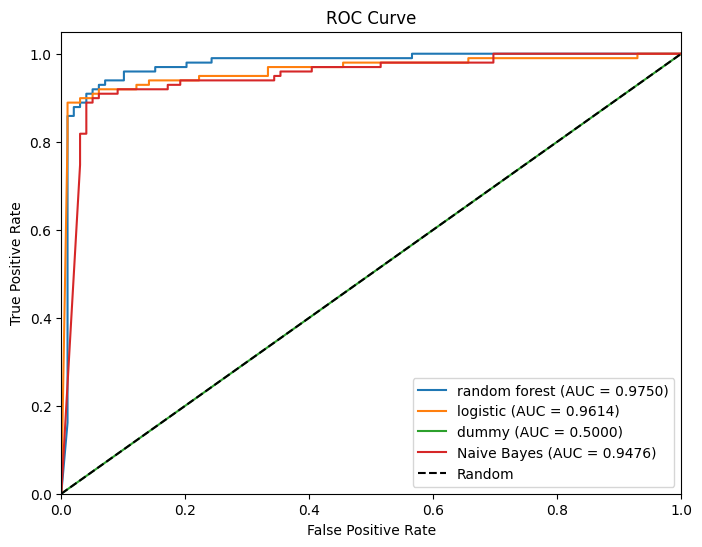

<Figure size 640x480 with 0 Axes>

In [27]:

plot_roc_curve(X_val_under,y_val_under,models,model_names)
plt.savefig('roc_insample.png');


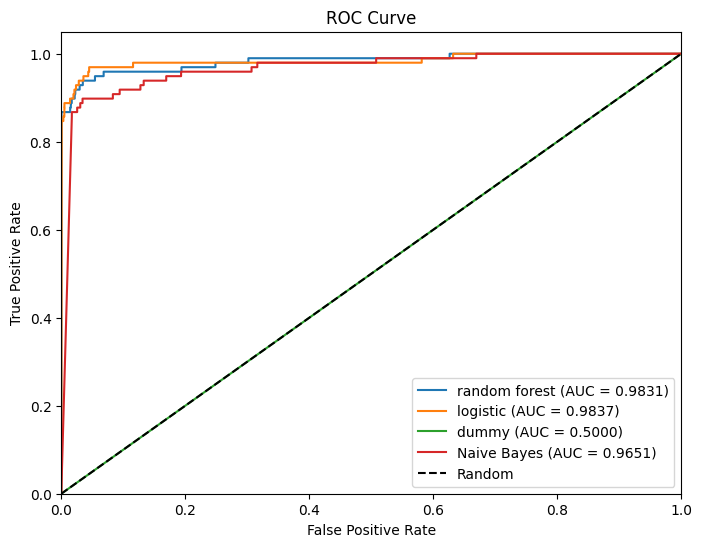

<Figure size 640x480 with 0 Axes>

In [28]:
plot_roc_curve(X_test_std, y_test, models, model_names)
plt.savefig('roc_outsample.png');


**Find best threshold**

In [29]:
models = [rf_grid_search.best_estimator_, logistic_grid_search.best_estimator_, gnb]
model_names = ['random forest', 'logistic', 'naive bayes']
results = []

def find_best_threshold(model, model_name):
    best_threshold = 0
    best_f1 = 0
    best_accuracy = 0
    best_precision = 0
    best_recall = 0
    # Iterate through thresholds and calculate F1-score
    for threshold in np.linspace(0, 1, 20):
        y = model.predict_proba(X_val_under)[:, 1]
        y_pred = (y >= threshold).astype(int)
        f1 = f1_score(y_val_under, y_pred)
        acc = accuracy_score(y_val_under, y_pred)
        pre = precision_score(y_val_under, y_pred)
        recall = recall_score(y_val_under, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
            best_accuracy = acc
            best_precision = pre
            best_recall = recall
    return model_name, best_threshold, best_f1, best_accuracy, best_precision, best_recall
    

# Find the best threshold for each model
for model, model_name in zip(models, model_names):
    model_name, best_threshold, best_f1, best_accuracy, best_precision, best_recall= find_best_threshold(model, model_name)
    results.append([model_name, best_threshold, best_f1, best_accuracy, best_precision, best_recall])
scores_df = pd.DataFrame(results, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
scores_df.to_csv('model_evaluation_scores.csv')
scores_df


,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,random forest,0.368421,0.934673,0.934343,0.930000,0.939394
1,logistic,0.578947,0.928571,0.929293,0.938144,0.919192
2,naive bayes,0.052632,0.922280,0.924242,0.946809,0.898990


**Confusion Matrix**

In [30]:
models =[rf_grid_search.best_estimator_, logistic_grid_search.best_estimator_]
model_names =['random forest' , 'logistic']
best_thresholds = [0.315789, 0.578947 ]

def plot_confusion_matrices(models, best_thresholds, X, y, model_names):
    # Create an empty list to store confusion matrices
    confusion_matrices = []

    # Iterate through models and best thresholds
    for model, threshold in zip(models, best_thresholds):
        # Predict class labels using the best threshold
        y_pred = (model.predict_proba(X)[:, 1] >= threshold).astype(int)

        # Calculate the confusion matrix
        cm = confusion_matrix(y, y_pred)

        # Append the confusion matrix to the list
        confusion_matrices.append(cm)

    # Create subplots for each confusion matrix
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))

    # Iterate through confusion matrices and model names
    for i, (model_name, cm) in enumerate(zip(model_names, confusion_matrices)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {model_name}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    plt.tight_layout()
    plt.show()

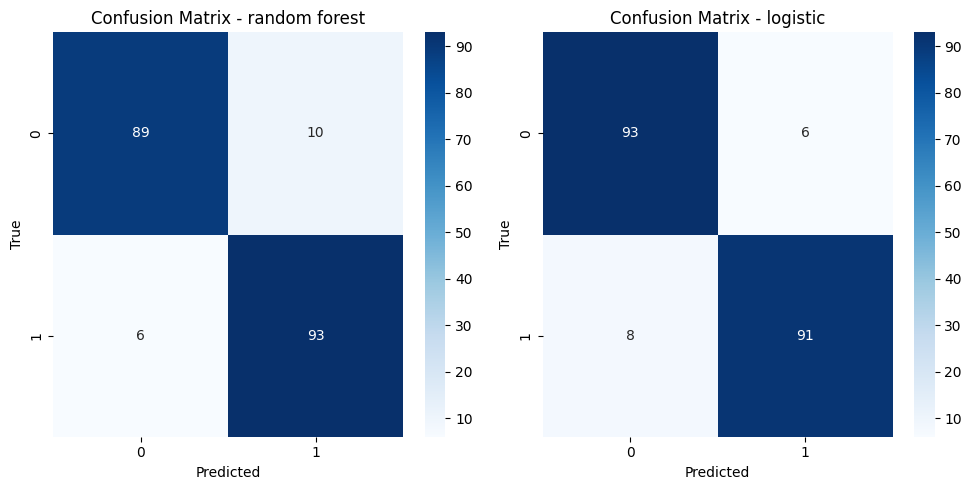

In [31]:
# val data
plot_confusion_matrices(models, best_thresholds, X_val_under, y_val_under, model_names)

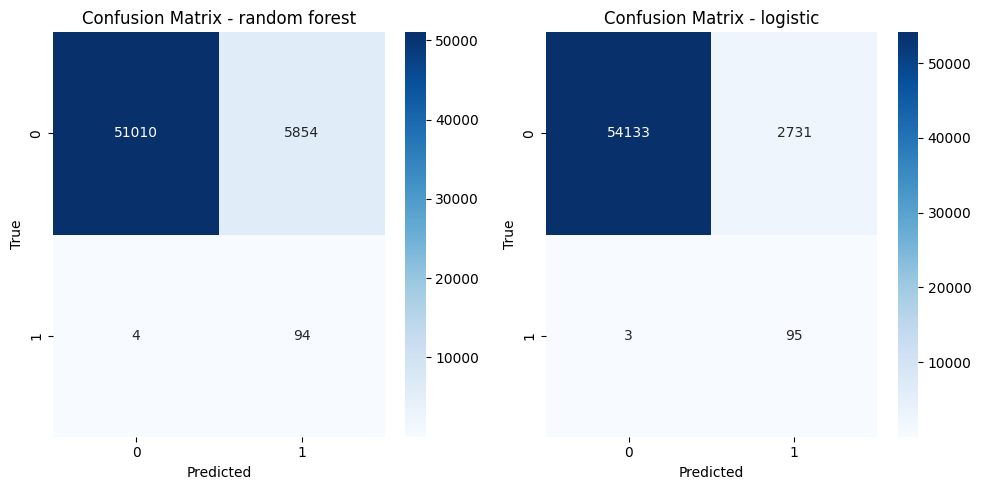

[CV 5/5; 38/48] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=200;, score=0.973 total time=   0.7s
[CV 2/5; 40/48] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200
[CV 2/5; 40/48] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200;, score=0.996 total time=   0.7s
[CV 1/5; 41/48] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100
[CV 1/5; 41/48] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.979 total time=   0.4s
[CV 4/5; 41/48] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100
[CV 4/5; 41/48] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimat

In [32]:
# test data
plot_confusion_matrices(models, best_thresholds, X_test_std, y_test, model_names)